In [2]:
from matplotlib import font_manager, rc
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
import numpy as np
import collections
import seaborn as sns


font_path = "data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)

Malgun Gothic


In [2]:
#youtube 크롤링 코드

import requests
from bs4 import BeautifulSoup

name_list=[]
Kategorie_list = []
subscriber_list = []
views_list = []

urlstr = 'https://kr.noxinfluencer.com/youtube-channel-rank/top-100-kr-all-youtuber-sorted-by-avgview-weekly'
r = requests.get(urlstr)
bs = BeautifulSoup(r.text, 'html.parser')

name_base = bs.select("span.rank-cell.pull-left.rank-desc > a > span")
Kategorie_base = bs.select("span.rank-cell.pull-left.rank-category > a")
subscriber_base = bs.select("span.rank-cell.pull-left.rank-subs > span.number")
views_base = bs.select("span.rank-cell.pull-left.rank-avg-view > span.number")

for name in name_base:
    name_list.append(name.text)
for Kategorie in Kategorie_base:
    Kategorie_list.append(Kategorie.text)
for subscriber in subscriber_base:
    subscriber_list.append(subscriber.text)
for views in views_base:
    views_list.append(views.text)

with open('output/youtub_view.csv', "wt", encoding="utf-8") as f:
    f.write('name_list,Kategorie_list,subscriber_list,views_list\n')  
    for i in range (len(name_list)):
        f.write(name_list[i]+","+Kategorie_list[i]+","+subscriber_list[i]+","+views_list[i]+'\n')

In [ ]:
#youtube 크롤링 코드

import requests
from bs4 import BeautifulSoup

name_list=[]
Kategorie_list = []
subscriber_list = []
views_list = []

urlstr = 'https://kr.noxinfluencer.com/youtube-channel-rank/top-100-kr-all-youtuber-sorted-by-subs-weekly'
r = requests.get(urlstr)
bs = BeautifulSoup(r.text, 'html.parser')

name_base = bs.select("span.rank-cell.pull-left.rank-desc > a > span")
Kategorie_base = bs.select("span.rank-cell.pull-left.rank-category > a")
subscriber_base = bs.select("span.rank-cell.pull-left.rank-subs > span.number")
views_base = bs.select("span.rank-cell.pull-left.rank-avg-view > span.number")

for name in name_base:
    name_list.append(name.text)
for Kategorie in Kategorie_base:
    Kategorie_list.append(Kategorie.text)
for subscriber in subscriber_base:
    subscriber_list.append(subscriber.text)
for views in views_base:
    views_list.append(views.text)

with open('output/youtub_ch.csv', "wt", encoding="utf-8") as f:
    f.write('name_list,Kategorie_list,subscriber_list,views_list\n')  
    for i in range (len(name_list)):
        f.write(name_list[i]+","+Kategorie_list[i]+","+subscriber_list[i]+","+views_list[i]+'\n')

In [ ]:
#웨이브 크롤링 코드

from selenium import webdriver
import time
driver = webdriver.Chrome('Z:\edgar\PYTHONDATAexam\chromedriver')
driver.implicitly_wait(2) 

#app > div.body > div:nth-child(2) > div > div:nth-child(1) > div.header-nav > div > ul > li:nth-child(1) > a
#app > div.body > div.member > div > div.sns-box > div.login-sns > ul > li.login-sns-each.tworld > a > span.icon-sns.icon-tworld

driver.get('https://www.wavve.com/list/MN85?api=apis.wavve.com%252Fcf%252Fmovie%252Fcontents%253Fsptheme%253Dsvod%2526price%253Dall%2526orderby%253Dviewtime%2526contenttype%253Dmovie%2526genre%253Dall%2526WeekDay%253Dall%2526uitype%253DMN85%2526uiparent%253DGN16-MN85%2526uirank%253D3%2526broadcastid%253D95705%2526offset%253D0%2526limit%253D20%2526uicode%253DMN85%2526mtype%253Dsvod&came=movie&page=1')
login = '#app > div.body > div:nth-child(2) > div > div:nth-child(1) > div.header-nav > div > ul > li:nth-child(1) > a'
login_click = driver.find_element_by_css_selector(login)
login_click.click()
time.sleep(0.2)
login_1 = '#app > div.body > div.member > div > div.sns-box > div.login-sns > ul > li.login-sns-each.tworld > a > span.icon-sns.icon-tworld'
login_click_1 = driver.find_element_by_css_selector(login_1)
login_click_1.click()
time.sleep(0.5)

login_id = driver.find_element_by_css_selector("#userId")
login_id.send_keys('아이디적는곳')#문장안에 아이디
login_pw = driver.find_element_by_css_selector("#password")
login_pw.send_keys("패스워드적는곳")#문장안에 패스워드

login_2 = ('#authLogin')
login_click_2 = driver.find_element_by_css_selector(login_2)
login_click_2.click()
time.sleep(1)


movie_title_list=[]
movie_genre_list=[]

for i in range(1,6,1):
    driver.get('https://www.wavve.com/list/MN85?api=apis.wavve.com%252Fcf%252Fmovie%252Fcontents%253Fsptheme%253Dsvod%2526price%253Dall%2526orderby%253Dviewtime%2526contenttype%253Dmovie%2526genre%253Dall%2526WeekDay%253Dall%2526uitype%253DMN85%2526uiparent%253DGN16-MN85%2526uirank%253D3%2526broadcastid%253D95705%2526offset%253D0%2526limit%253D20%2526uicode%253DMN85%2526mtype%253Dsvod&came=movie&page='+str(i))
    for j in range(1,21,1):
        movie = '#g-contents > div.list-view-detail > div:nth-child('+str(j)+') > a > div.thumb-image > img'
        movie_click = driver.find_element_by_css_selector(movie)
        movie_click.click()
        time.sleep(0.2)
        movie_title = driver.find_elements_by_css_selector('#g-contents > div.vod-player > div > div.player-bottom-contents > h2 > span')
        movie_genre = driver.find_elements_by_css_selector('#g-contents > div.vod-player > div > div.player-bottom-contents > p > span:nth-child(3)')
        
        for title in movie_title :    
            movie_title_list.append(title.text)
        for genre in movie_genre :    
            movie_genre_list.append(genre.text)
        time.sleep(0.3)
        driver.get('https://www.wavve.com/list/MN85?api=apis.wavve.com%252Fcf%252Fmovie%252Fcontents%253Fsptheme%253Dsvod%2526price%253Dall%2526orderby%253Dviewtime%2526contenttype%253Dmovie%2526genre%253Dall%2526WeekDay%253Dall%2526uitype%253DMN85%2526uiparent%253DGN16-MN85%2526uirank%253D3%2526broadcastid%253D95705%2526offset%253D0%2526limit%253D20%2526uicode%253DMN85%2526mtype%253Dsvod&came=movie&page='+str(i))
    

with open('output/wavve.csv', "wt", encoding="utf-8") as f:
    f.write('movie_title_list,movie_genre_list\n')  
    for k in range (len(movie_title_list)):
        f.write(movie_title_list[k]+","+movie_genre_list[k]+'\n')

        

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
import numpy as np

df = pd.read_csv('output/youtube_ch.csv')
subscriber_list = []
views_list = []
print(df)

aa = df['subscriber_list']
bb = df['views_list']
for i in range(len(aa)):
    j = aa[i]
    j = j.replace('만','')
    subscriber_list.append(j)
for i in range(len(bb)):
    j = bb[i]
    j = j.replace('만','')
    views_list.append(j)
df['subscriber_list'] = pd.to_numeric(subscriber_list)    
df['views_list'] = pd.to_numeric(views_list) 

print(df)



                name_list Kategorie_list subscriber_list views_list
0               BLACKPINK             음악           6800만   2047.52만
1             HYBE LABELS             음악           6180만     62.15만
2               BANGTANTV             음악           5930만     877.1만
3                  SMTOWN             음악           2890만       929만
4   1MILLION Dance Studio             댄스           2430만      3.85만
..                    ...            ...             ...        ...
94                 크림히어로즈             동물            379만      5.08만
95            워크맨-Workman         엔터테인먼트            379만    208.35만
96         CoCosToy 꼬꼬스토이             교육            377만     14.34만
97                 WINNER             음악            376만     53.44만
98            waveya 2011             댄스            373만     25.98만

[99 rows x 4 columns]
                name_list Kategorie_list  subscriber_list  views_list
0               BLACKPINK             음악             6800     2047.52
1             HYBE LA

Counter({'음악': 36, '키즈': 16, '먹방': 13, 'TV': 11, '인물/블로그': 6, '요리': 4, '댄스': 3, '영화/애니메이션': 2, '토이': 2, '엔터테인먼트': 2, '뷰티': 1, '과학기술': 1, '동물': 1, '교육': 1})


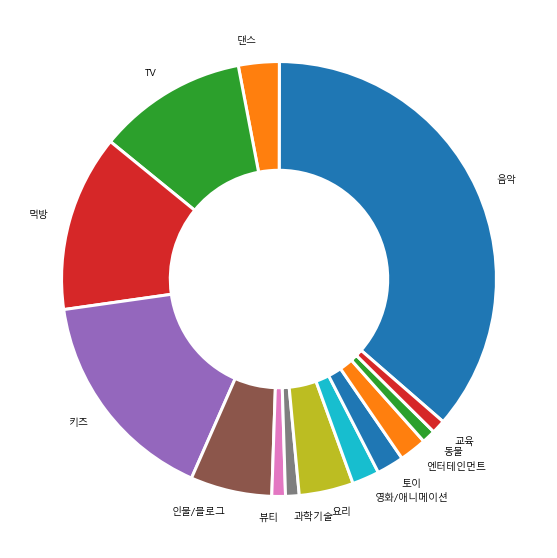

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
import numpy as np
import collections

df = pd.read_csv('output/youtube_ch.csv')
kategorie = []
kategorie = collections.Counter(df['Kategorie_list'])


wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 3}

Kval = kategorie.values()
Kkey = kategorie.keys()



print(kategorie)
plt.figure(figsize=(10,10))
plt.pie(Kval,labels=Kkey,wedgeprops=wedgeprops,startangle=319)
plt.show()

In [4]:
import seaborn as sns

mycolors = sns.color_palette('Set3',len(df2.index))

view_sort = df2.sort_values(by='views_list')
view_sort = view_sort.tail(20)
plt.figure(figsize=(20,40))
plt.barh(view_sort['name_list'], view_sort['views_list'], height=-0.6, color=mycolors)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


NameError: name 'df2' is not defined

C:\Users\EDGAR\anaconda3\envs\pydatavenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\EDGAR\anaconda3\envs\pydatavenv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0, flags=flags)


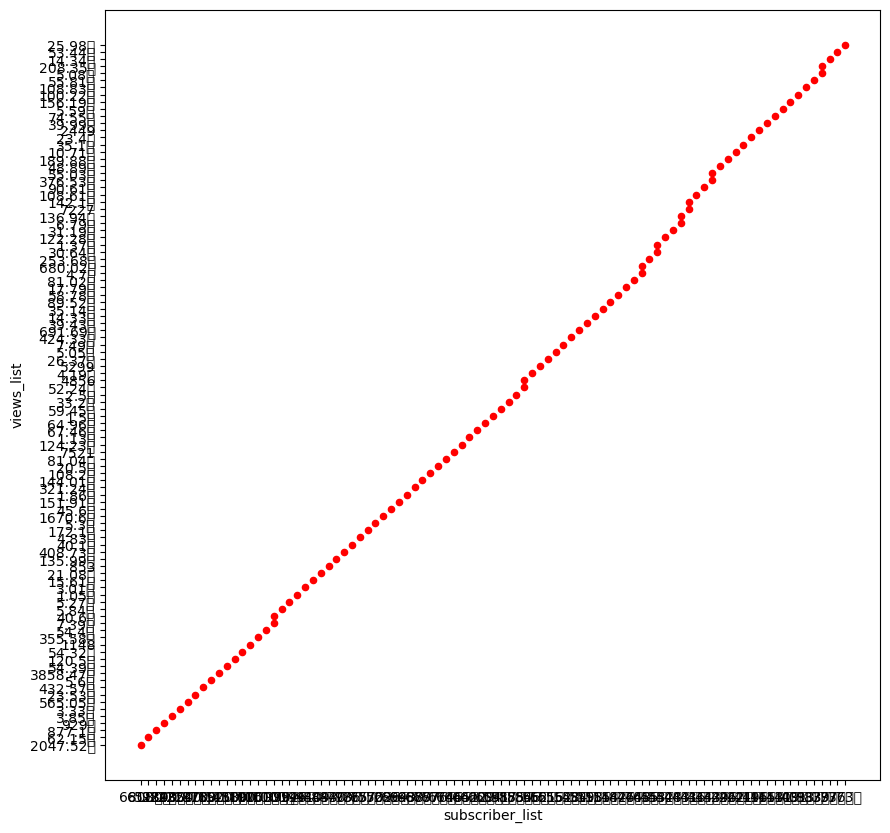

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
df.plot(kind='scatter',x='subscriber_list',y='views_list',c='red',figsize=(10,10))
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
import numpy as np

df2 = pd.read_csv('output/youtube_view.csv')
subscriber_list = []
views_list = []
print(df2)

aa = df2['subscriber_list']
bb = df2['views_list']
for i in range(len(aa)):
    j = aa[i]
    j = j.replace('만','')
    subscriber_list.append(j)
for i in range(len(bb)):
    j = bb[i]
    j = j.replace('만','')
    views_list.append(j)
df2['subscriber_list'] = pd.to_numeric(subscriber_list)    
df2['views_list'] = pd.to_numeric(views_list) 

print(df2)

                name_list Kategorie_list subscriber_list views_list
0               BLACKPINK             음악           6840만   2358.26만
1               땅콩 Peanut          애니메이션           46.8만    1303.1만
2                  SMTOWN             음악           2900만     953.9만
3               BANGTANTV             음악           5960만    846.65만
4      Imagine your Korea         여행/이벤트           46.6만    712.65만
..                    ...            ...             ...        ...
94               감스트GAMST         엔터테인먼트            209만    157.93만
95              NCT DREAM             음악            411만    157.79만
96  검은별 공작소 B-Star Crafts             기타           12.8만    157.08만
97                오레오 코리아             기타           1.88만    156.21만
98     매일맛나 delicious day             요리            293만    155.31만

[99 rows x 4 columns]
                name_list Kategorie_list  subscriber_list  views_list
0               BLACKPINK             음악          6840.00     2358.26
1               땅콩 Pe

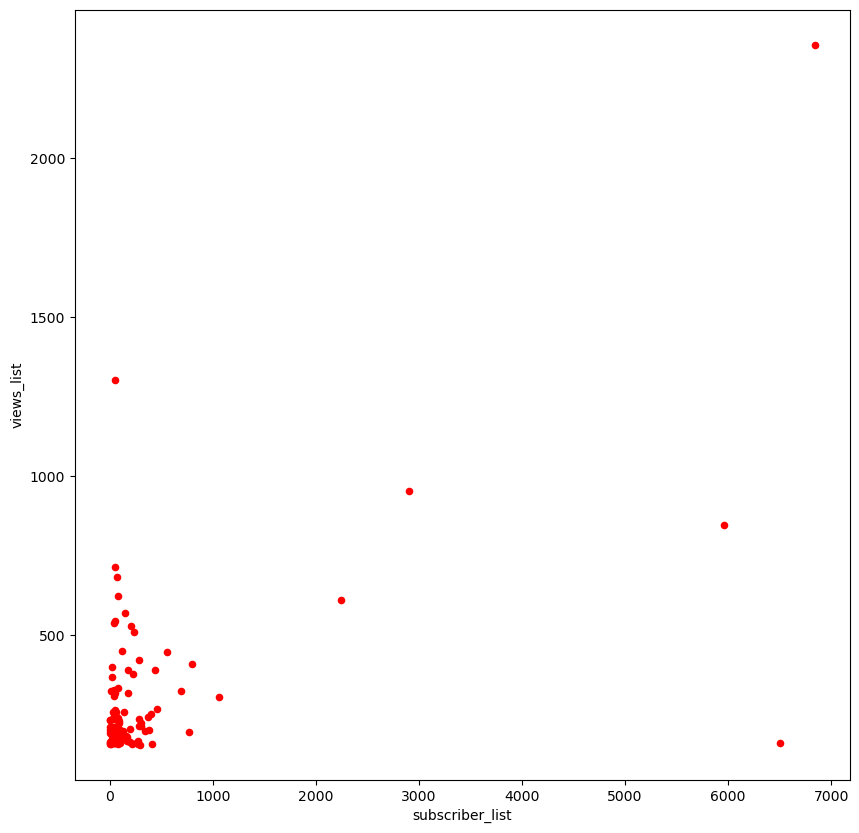

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
df2.plot(kind='scatter',x='subscriber_list',y='views_list',c='red',figsize=(10,10))
plt.show()

                name_list Kategorie_list  subscriber_list  views_list
0               BLACKPINK             음악          6840.00     2358.26
1               땅콩 Peanut          애니메이션            46.80     1303.10
2                  SMTOWN             음악          2900.00      953.90
3               BANGTANTV             음악          5960.00      846.65
4      Imagine your Korea         여행/이벤트            46.60      712.65
..                    ...            ...              ...         ...
94               감스트GAMST         엔터테인먼트           209.00      157.93
95              NCT DREAM             음악           411.00      157.79
96  검은별 공작소 B-Star Crafts             기타            12.80      157.08
97                오레오 코리아             기타             1.88      156.21
98     매일맛나 delicious day             요리           293.00      155.31

[99 rows x 4 columns]


<Figure size 640x480 with 0 Axes>

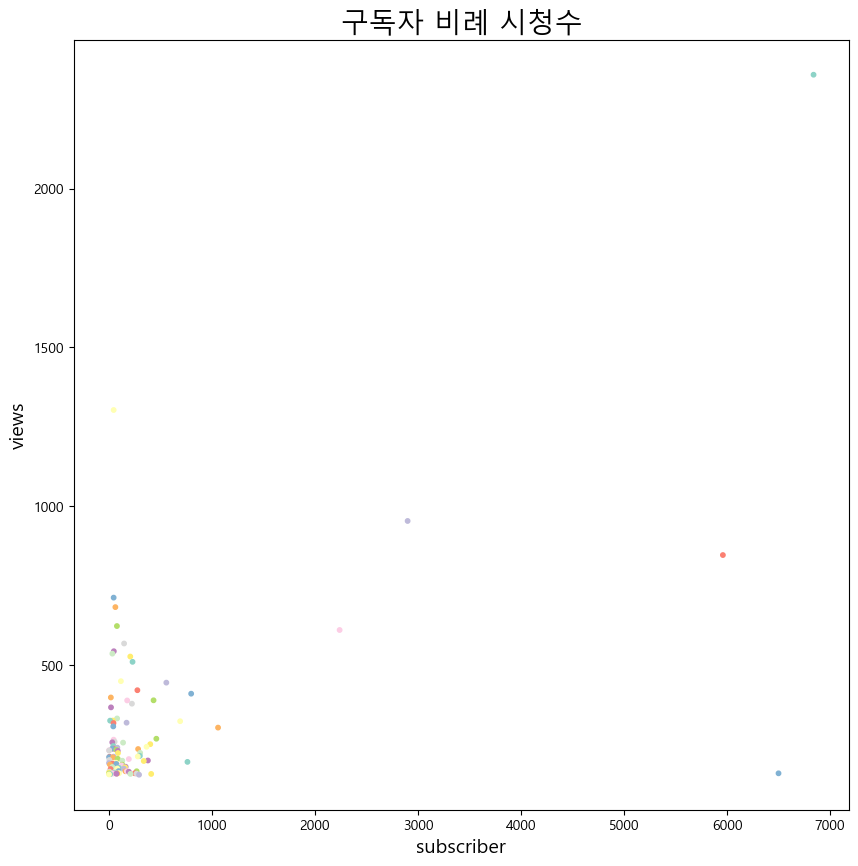

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
import numpy as np
import collections

print(df2)
plt.figure()
myc=['black','red','green','blue','lightcoral','darkred','coral','darkorange','tan','gold','greenyellow','plum','mediumaquamarine','purple','darkslateblue']


# scatter plot
df2.plot(kind='scatter',
          x='subscriber_list', 
          y='views_list', 
          s=10,
          c=mycolors,
        figsize=(10,10))
plt.title('구독자 비례 시청수', fontsize=20)
plt.xlabel('subscriber', fontsize=14)
plt.ylabel('views', fontsize=14)
plt.show()


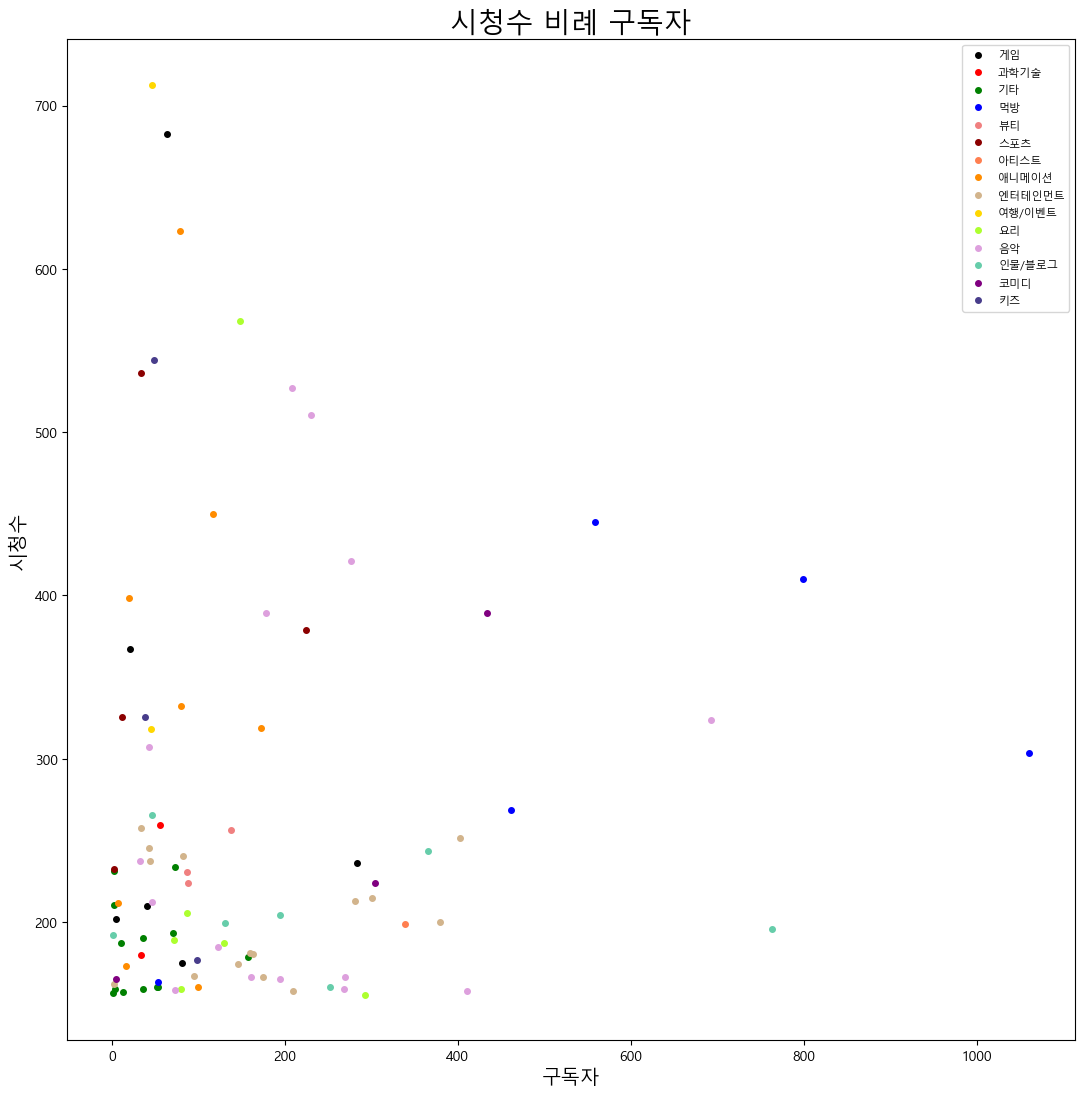

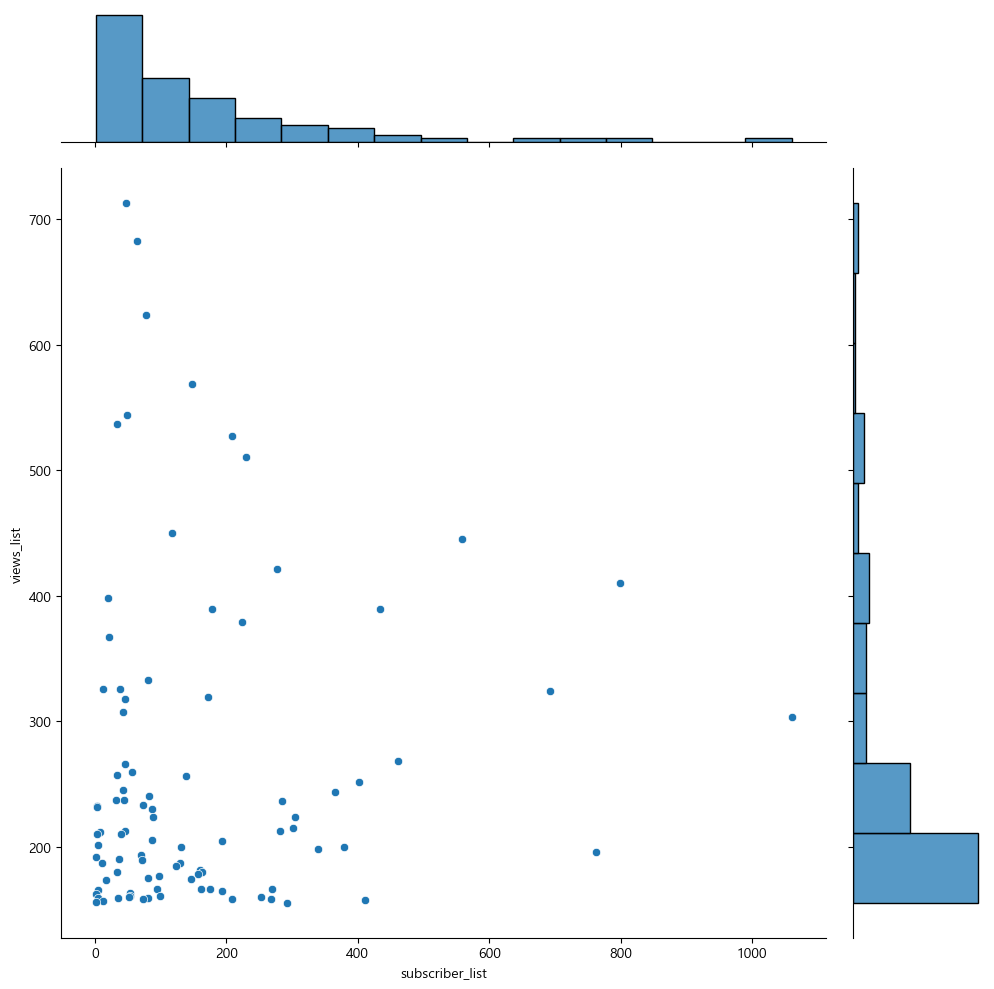

In [13]:
a = pd.DataFrame([df2['Kategorie_list'],df2['subscriber_list'],df2['views_list']])
a = a.T
b = a['subscriber_list'] < 2000

c = a['views_list'] < 1000

d = a[b & c]


groups = d.groupby('Kategorie_list')



fig, ax = plt.subplots(figsize=(13,13))
myc=['black','red','green','blue','lightcoral','darkred','coral','darkorange','tan','gold','greenyellow','plum','mediumaquamarine','purple','darkslateblue']
#myc = sns.color_palette('hls', 20)





i=0
for name, group in groups:
    ax.plot(group.subscriber_list, 
            group.views_list, 
            marker='o', 
            linestyle='',
            label=name,
            color = myc[i],
            markersize=4

           )
    i+=1
    
plt.title('시청수 비례 구독자', fontsize=20)
plt.xlabel('구독자', fontsize=14)
plt.ylabel('시청수', fontsize=14)
ax.legend(fontsize=8, loc='upper right')
plt.show()

sns.jointplot(x="subscriber_list", y="views_list", data=d,height=10)
plt.show()

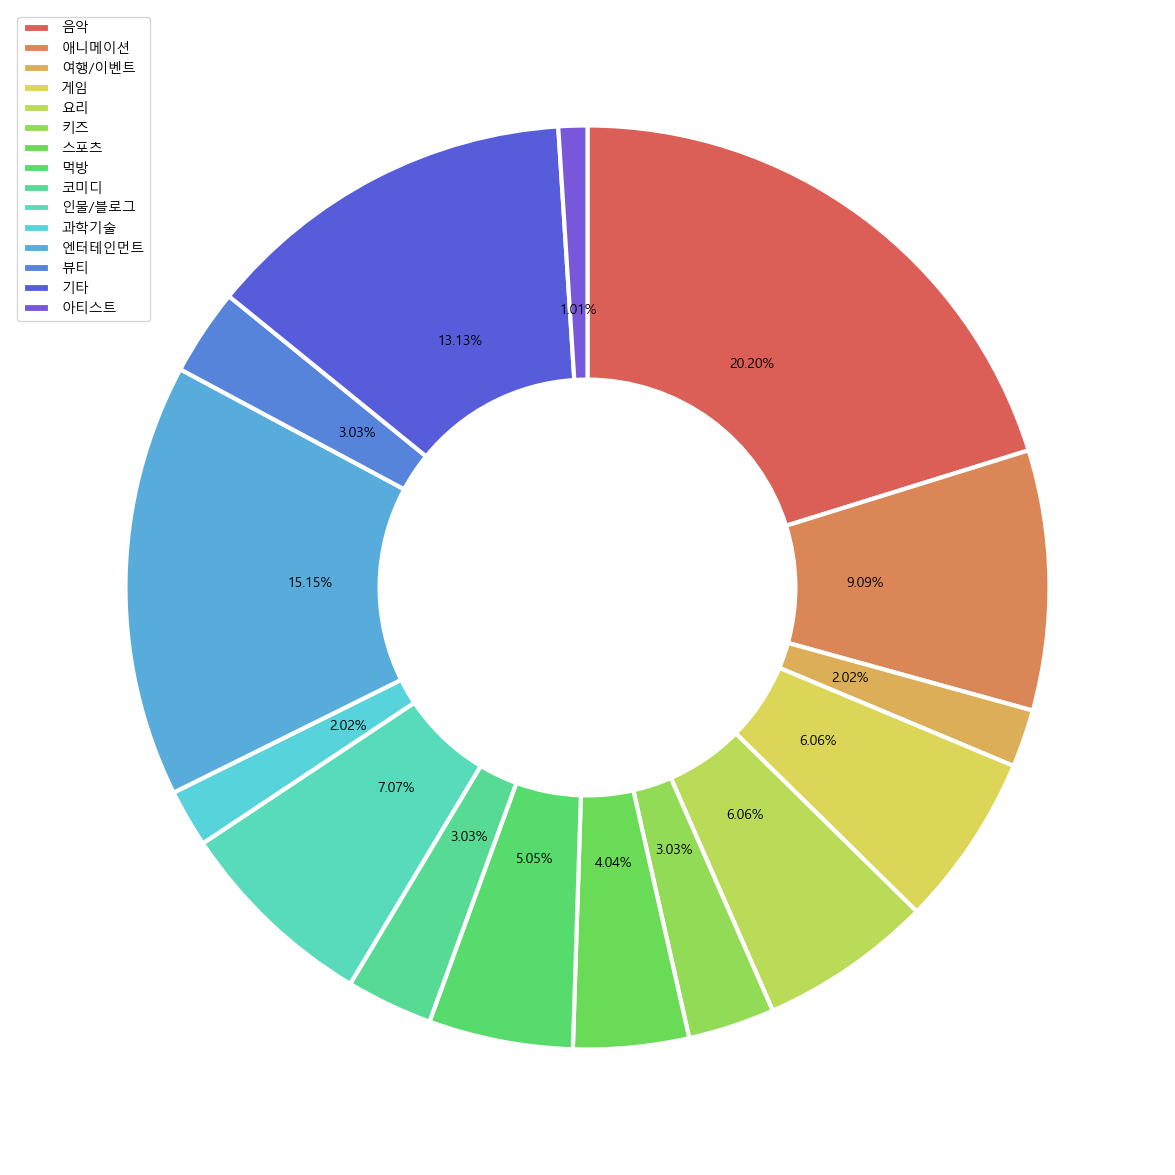

In [14]:


kategorie = collections.Counter(df2['Kategorie_list'])

import matplotlib.pyplot as plt
import numpy as np
 
## 데이터 준비
## 데이터 준비

labels = kategorie.keys() ## 라벨
frequency = kategorie.values() ## 빈도
myc = sns.color_palette('hls', 20)
fig = plt.figure(figsize=(15,15)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
pie = ax.pie(frequency, ## 파이차트 출력
             startangle=90, ## 시작점을 90도(degree)로 지정
             counterclock=False, ## 시계 방향으로 그린다.
             autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
             wedgeprops={'edgecolor':'w','width': 0.55,'linewidth': 3}, ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
             colors=myc
       )
plt.legend(pie[0],labels) ## 범례 표시
plt.show()



In [15]:
#봉인된 문제

kategorie = collections.Counter(df['Kategorie_list'])
a=0
c = []
for i in kategorie:
    a += kategorie[i]
for i in kategorie:
    b = kategorie[i]/a*1000
    b = round(b,3)
    kategorie.values[i] = b

print(kategorie.values)
print(kategorie.keys())
print(kategorie)

TypeError: 'builtin_function_or_method' object does not support item assignment

In [16]:
youtube_view_percent = pd.DataFrame(df2['views_list'].groupby(df2['Kategorie_list']).sum())
youtube_view_sum = df2['views_list'].sum()
youtube_view_percent['percent'] = round(youtube_view_percent['views_list']/youtube_view_sum*100,1)
display(youtube_view_percent)


,views_list,percent
Kategorie_list,,
게임,1872.62,6.1
과학기술,438.89,1.4
기타,2376.15,7.8
먹방,1590.76,5.2
뷰티,710.19,2.3
스포츠,1473.13,4.8
아티스트,198.51,0.7
애니메이션,3971.21,13.0
엔터테인먼트,3047.39,10.0


In [17]:
ndf = pd.read_csv("output/TV통합.csv")
ndf = ndf.loc[(ndf.date == '10월2주차') | (ndf.date == '10월1주차') | (ndf.date == '9월3주차') | (ndf.date == '9월1주차'),[ 'number', 'detail', 'genre']]


dfgrouped = pd.DataFrame(ndf['number'].groupby(ndf['detail']).sum())
tv_view_sum = ndf['number'].sum()
dfgrouped['percent'] = round(dfgrouped['number']/tv_view_sum*100,1)

display(dfgrouped)

,number,percent
detail,,
가족,2245,0.9
다큐,8999,3.7
로맨스,32525,13.3
로맨틱코미디,16364,6.7
리얼리티,48527,19.8
막장,14071,5.7
미스터리,3265,1.3
버라이어티 쇼,12652,5.2
범죄,5801,2.4


,Kategorie_list,views_list,percent,content
0,게임,18726200.0,6.1,youtube
1,과학기술,4388900.0,1.4,youtube
2,기타,23761500.0,7.8,youtube
3,먹방,15907600.0,5.2,youtube
4,뷰티,7101900.0,2.3,youtube
5,스포츠,14731300.0,4.8,youtube
6,아티스트,1985100.0,0.7,youtube
7,애니메이션,39712100.0,13.0,youtube
8,엔터테인먼트,30473900.0,10.0,youtube
9,여행/이벤트,10305800.0,3.4,youtube


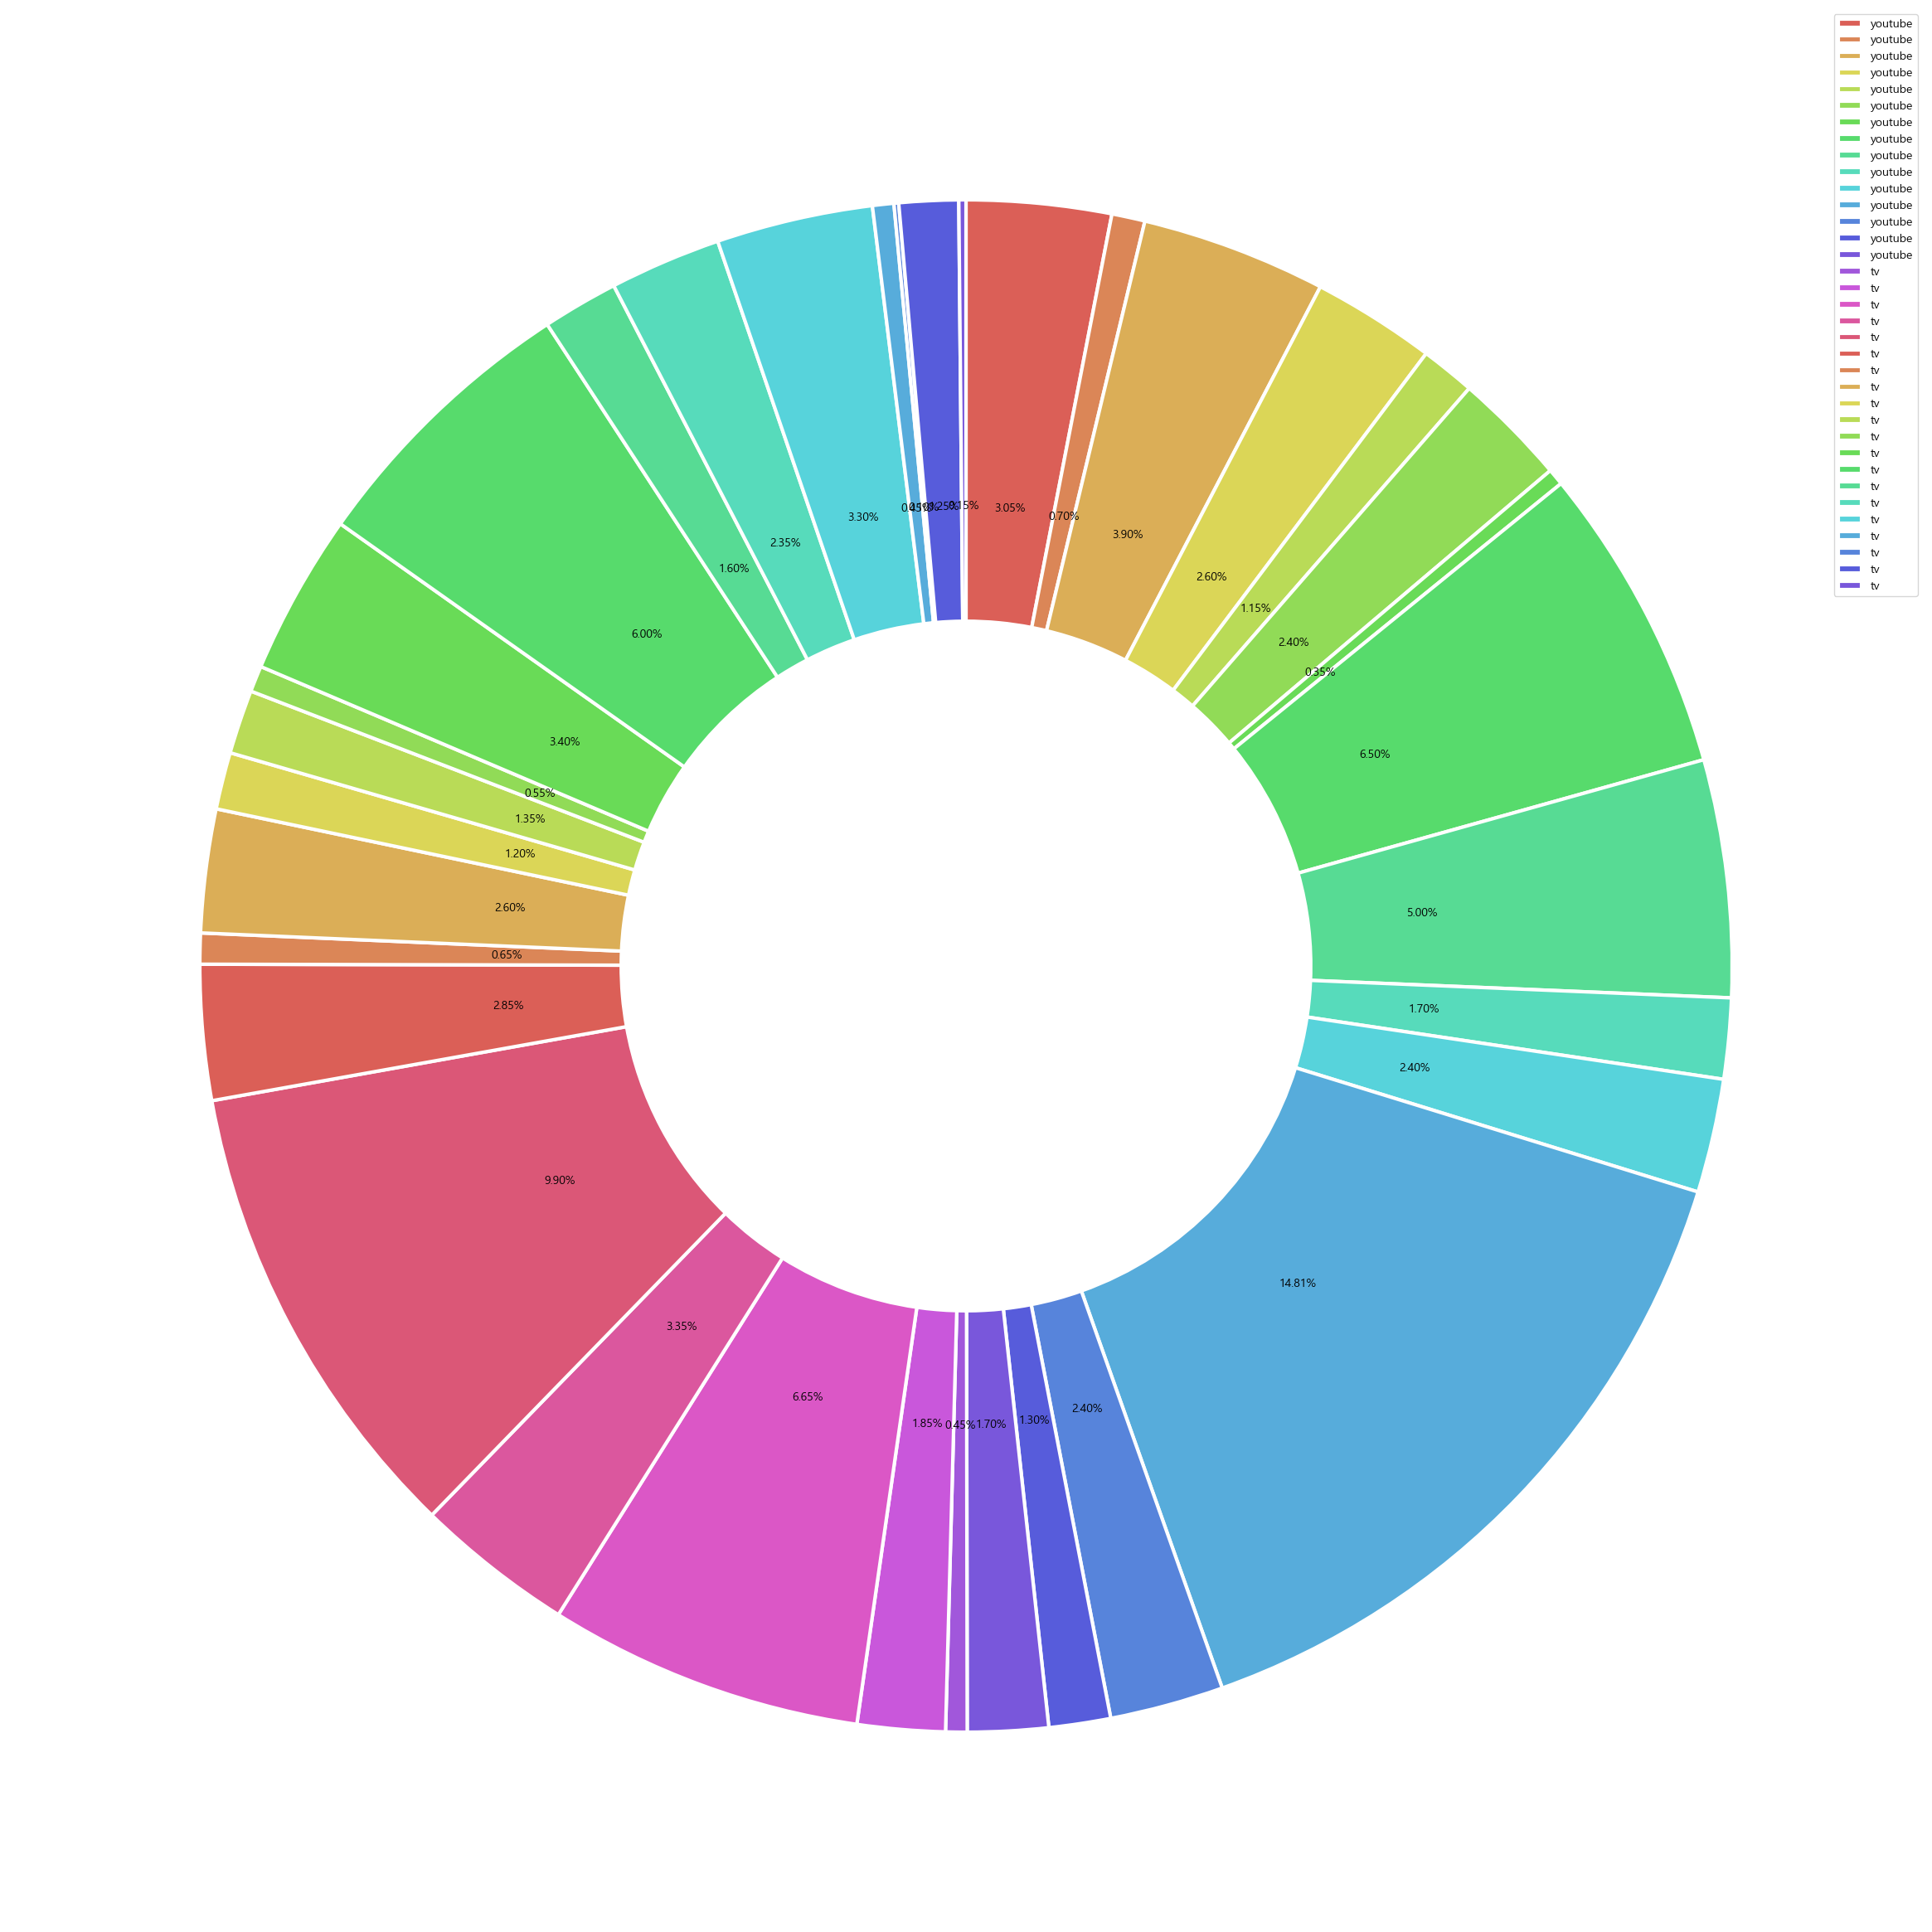

In [18]:
youtube_view_percent2 = youtube_view_percent.copy()
tv_view_sum2 = dfgrouped.copy()

tv_view_sum2.reset_index(drop=False,inplace=True)
youtube_view_percent2.reset_index(drop=False,inplace=True)
tv_view_sum2.columns = ['Kategorie_list','views_list','percent']
youtube_view_percent2['content'] = 'youtube'
youtube_view_percent2['views_list'] = youtube_view_percent2['views_list']*10000
tv_view_sum2['content'] = 'tv'
you_tv = pd.concat([youtube_view_percent2,tv_view_sum2])



display(you_tv)

labels = you_tv['content'] ## 라벨
frequency = you_tv['percent'] ## 빈도
myc = sns.color_palette('hls', 20)
fig = plt.figure(figsize=(30,30)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
pie = ax.pie(frequency, ## 파이차트 출력
             startangle=90, ## 시작점을 90도(degree)로 지정
             counterclock=False, ## 시계 방향으로 그린다.
             autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
             wedgeprops={'edgecolor':'w','width': 0.55,'linewidth': 3}, ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
             colors=myc             
       )
plt.legend(pie[0],labels) ## 범례 표시
plt.show()
